In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('dataset.csv')
data.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [3]:
data.drop(data.columns[0], axis=1, inplace=True)
data.shape

(114000, 20)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

In [5]:
features_with_nan=[feature for feature in data.columns if data[feature].isna().sum()>0]
features_with_nan

['artists', 'album_name', 'track_name']

In [6]:
for feature in features_with_nan:
    print('Number of missing value in {}: {}'.format(feature,np.round(data[feature].isna().sum())))

Number of missing value in artists: 1
Number of missing value in album_name: 1
Number of missing value in track_name: 1


In [7]:
data=data.dropna()
data.isna().sum()

track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [8]:
data=data.drop_duplicates()
data.shape

(113549, 20)

In [9]:
feature_numerical=[feature for feature in data.columns if data[feature].dtype!='O']
print('Number of numerical columns=', len(feature_numerical))
data[feature_numerical].head()

Number of numerical columns= 15


,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4


In [10]:
feature_discrete_numerical=[feature for feature in feature_numerical if data[feature].nunique()<50]
feature_discrete_numerical

['explicit', 'key', 'mode', 'time_signature']

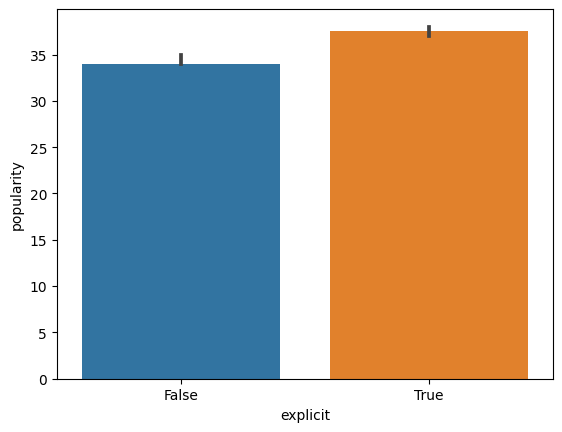

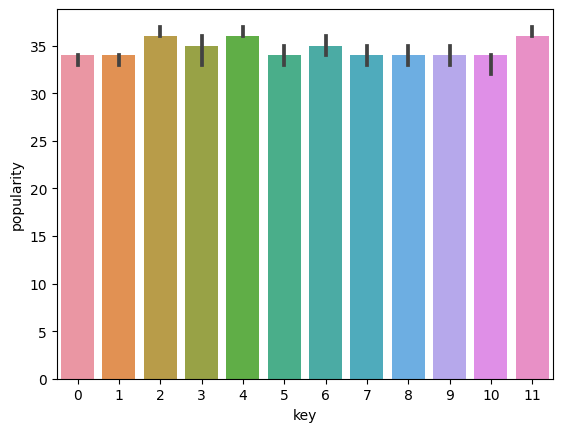

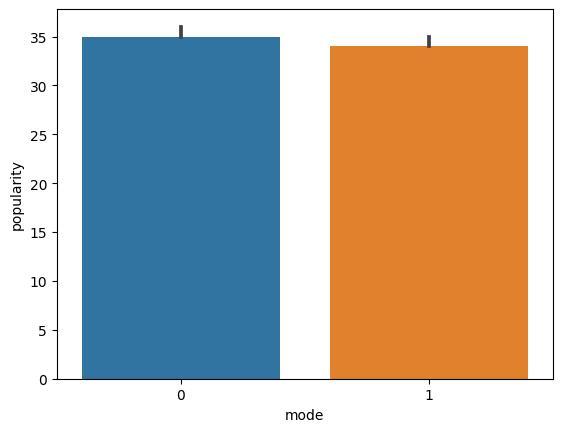

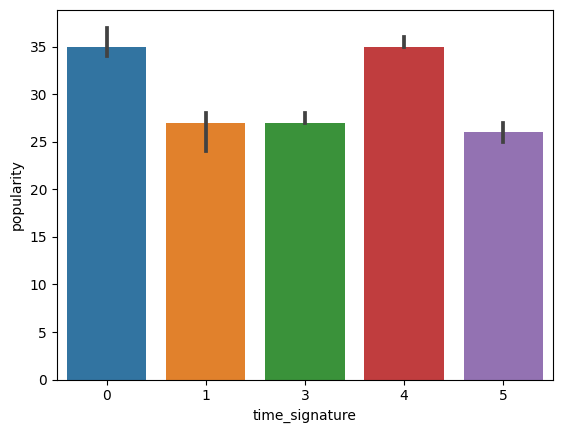

In [11]:
for feature in feature_discrete_numerical:
    dataset=data.copy()
    sns.barplot(x=feature, y=dataset['popularity'], data=dataset, estimator=np.median)
    plt.show()

In [12]:
features_continuous_numerical=[features for features in feature_numerical if features not in feature_discrete_numerical]
features_continuous_numerical

['popularity',
 'duration_ms',
 'danceability',
 'energy',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo']

In [13]:
feature_categorical=[feature for feature in data.columns if data[feature].dtypes=='O']
print('Number of categorical features:', len(feature_categorical))
data[feature_categorical].head()

Number of categorical features: 5


,track_id,artists,album_name,track_name,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,acoustic


In [14]:
feature_categorical

['track_id', 'artists', 'album_name', 'track_name', 'track_genre']

In [15]:
for feature in feature_categorical:
    dataset=data.copy()
    print(feature, ': Number of unique entries:', dataset[feature].nunique())

track_id : Number of unique entries: 89740
artists : Number of unique entries: 31437
album_name : Number of unique entries: 46589
track_name : Number of unique entries: 73608
track_genre : Number of unique entries: 114


In [16]:
data['speechiness'].sort_values()

101681    0.000
98779     0.000
101663    0.000
101666    0.000
101667    0.000
          ...  
18227     0.962
18432     0.962
18530     0.963
18504     0.963
18152     0.965
Name: speechiness, Length: 113549, dtype: float64

In [17]:
speechiness_type=[]
for i in data.speechiness:
    if i<0.33:
        speechiness_type.append('Low')
    elif 0.33<=i<=0.66:
        speechiness_type.append('Medium')
    else:
        speechiness_type.append('High')

In [18]:
data['speechiness_type']=speechiness_type
print(data.speechiness_type.value_counts())
data.head()

Low       109947
Medium      2726
High         876
Name: speechiness_type, dtype: int64


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,speechiness_type
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,...,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,Low
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,...,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,Low
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,...,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,Low
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,...,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,Low
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,...,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,Low


In [19]:
data.drop(data.columns[0], axis=1, inplace=True)
#Selecting the numerical features:
feature_numerical=[feature for feature in data.columns if data[feature].dtypes!='O']
#Selecting the discrete numerical features
feature_discrete_numerical=[feature for feature in feature_numerical if data[feature].nunique()<50]
#Selecting the continuous features
feature_continuous_numerical=[feature for feature in feature_numerical if feature not in feature_discrete_numerical]
feature_continuous_numerical

['popularity',
 'duration_ms',
 'danceability',
 'energy',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo']

In [20]:
data.shape

(113549, 20)

In [21]:
feature_categorical=[feature for feature in data.columns if feature not in feature_numerical]
dataset=data.copy()
for feature in feature_categorical:
    print(feature,': {}, missing values {}'.format(data[feature].nunique(), data[feature].isna().sum()))

artists : 31437, missing values 0
album_name : 46589, missing values 0
track_name : 73608, missing values 0
track_genre : 114, missing values 0
speechiness_type : 3, missing values 0


In [22]:
pip install category_encoders

In [23]:
import category_encoders as ce

In [24]:
encoder1=ce.BaseNEncoder(cols=['track_genre','album_name', 'track_name','artists'], base=10, return_df=True)
data=encoder1.fit_transform(data)
data.head()

,artists_0,artists_1,artists_2,artists_3,artists_4,album_name_0,album_name_1,album_name_2,album_name_3,album_name_4,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre_0,track_genre_1,track_genre_2,speechiness_type
0,0,0,0,0,1,0,0,0,0,1,...,0.0322,0.000001,0.3580,0.715,87.917,4,0,0,1,Low
1,0,0,0,0,2,0,0,0,0,2,...,0.9240,0.000006,0.1010,0.267,77.489,4,0,0,1,Low
2,0,0,0,0,3,0,0,0,0,3,...,0.2100,0.000000,0.1170,0.120,76.332,4,0,0,1,Low
3,0,0,0,0,4,0,0,0,0,4,...,0.9050,0.000071,0.1320,0.143,181.740,3,0,0,1,Low
4,0,0,0,0,5,0,0,0,0,5,...,0.4690,0.000000,0.0829,0.167,119.949,4,0,0,1,Low


In [25]:
data=pd.get_dummies(data=data, columns=['speechiness_type'], drop_first=True)
print(data.shape)
data.head()

(113549, 35)


,artists_0,artists_1,artists_2,artists_3,artists_4,album_name_0,album_name_1,album_name_2,album_name_3,album_name_4,...,instrumentalness,liveness,valence,tempo,time_signature,track_genre_0,track_genre_1,track_genre_2,speechiness_type_Low,speechiness_type_Medium
0,0,0,0,0,1,0,0,0,0,1,...,0.000001,0.3580,0.715,87.917,4,0,0,1,1,0
1,0,0,0,0,2,0,0,0,0,2,...,0.000006,0.1010,0.267,77.489,4,0,0,1,1,0
2,0,0,0,0,3,0,0,0,0,3,...,0.000000,0.1170,0.120,76.332,4,0,0,1,1,0
3,0,0,0,0,4,0,0,0,0,4,...,0.000071,0.1320,0.143,181.740,3,0,0,1,1,0
4,0,0,0,0,5,0,0,0,0,5,...,0.000000,0.0829,0.167,119.949,4,0,0,1,1,0


In [26]:
data['explicit']=np.where(data['explicit']==False, 0,1)

In [27]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
features_scaling=[feature for feature in feature_numerical if feature not in ['popularity','mode']]
scaler.fit(data[features_scaling])

StandardScaler()

In [28]:
scaler.transform(data[features_scaling])

array([[ 0.02428874, -0.30593202,  0.62839367, ...,  0.92898358,
        -1.14299362,  0.22165951],
       [-0.73742535, -0.30593202, -0.84789057, ..., -0.79939532,
        -1.4909088 ,  0.22165951],
       [-0.16215529, -0.30593202, -0.74408933, ..., -1.36651965,
        -1.52951044,  0.22165951],
       ...,
       [ 0.40770188, -0.30593202,  0.35735711, ...,  1.03700726,
         0.34038354,  0.22165951],
       [ 0.52448313, -0.30593202,  0.11515423, ..., -0.23612898,
         0.4598918 ,  0.22165951],
       [ 0.12916351, -0.30593202, -0.23661663, ...,  0.90197766,
        -1.43389048,  0.22165951]])

In [29]:
data_to_replace=pd.DataFrame(scaler.transform(data[features_scaling]), columns=features_scaling)
data_to_replace.head()

,duration_ms,explicit,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0.024289,-0.305932,0.628394,-0.721328,-1.210476,0.298800,0.551483,-0.849230,-0.503538,0.758094,0.928984,-1.142994,0.221660
1,-0.737425,-0.305932,-0.847891,-1.896382,-1.210476,-1.794228,-0.079182,1.837684,-0.503524,-0.591264,-0.799395,-1.490909,0.221660
2,-0.162155,-0.305932,-0.744089,-1.127618,-1.491364,-0.297440,-0.273960,-0.313535,-0.503542,-0.507257,-1.366520,-1.529510,0.221660
3,-0.245726,-0.305932,-1.735968,-2.320198,-1.491364,-2.049645,-0.457392,1.780439,-0.503313,-0.428501,-1.277786,1.987275,-2.092538
4,-0.274670,-0.305932,0.293923,-0.793026,-0.929587,-0.286864,-0.303272,0.466809,-0.503542,-0.686296,-1.185194,-0.074292,0.221660


In [30]:
for feature in features_scaling:
    data[feature]=data_to_replace[feature].values
data.isna().sum()

artists_0                  0
artists_1                  0
artists_2                  0
artists_3                  0
artists_4                  0
album_name_0               0
album_name_1               0
album_name_2               0
album_name_3               0
album_name_4               0
track_name_0               0
track_name_1               0
track_name_2               0
track_name_3               0
track_name_4               0
popularity                 0
duration_ms                0
explicit                   0
danceability               0
energy                     0
key                        0
loudness                   0
mode                       0
speechiness                0
acousticness               0
instrumentalness           0
liveness                   0
valence                    0
tempo                      0
time_signature             0
track_genre_0              0
track_genre_1              0
track_genre_2              0
speechiness_type_Low       0
speechiness_ty

In [31]:
X=data.drop(['track_genre_0, '], axis=1)
y=data['track_genre']

KeyError: "['track_genre'] not found in axis"

In [ ]:
X.head()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=7)

In [ ]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

In [ ]:
def correlation(dataset,threshold):
    correlated_columns=set()
    correlation_matrix=dataset.corr()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i,j])>threshold:
                colname=correlation_matrix.columns[i]
                correlated_columns.add(colname)
    return correlated_columns
        

In [ ]:
corr_features=correlation(X_train,0.7)
print(len(set(corr_features)))
print(corr_features)

In [ ]:
X_train_corr=X_train.copy()
X_test_corr=X_test.copy()

In [ ]:
X_train_corr.drop(corr_features, axis=1, inplace=True)
X_test_corr.drop(corr_features, axis=1, inplace=True)
print(X_train_corr.shape, X_test_corr.shape)

In [ ]:
X_train_corr.isna().sum()

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtree=DecisionTreeRegressor()
def model(name):
    name.fit(X_train_corr,y_train)
    prediction=name.predict(X_test_corr)
    residual=y_test-prediction
    
    plt.figure(figsize=(15,6))
    
    plt.subplot(1,2,1)
    plt.scatter(y_test,prediction)
    
    plt.subplot(1,2,2)
    sns.distplot(residual, hist=False, kde=True)
    plt.show()

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
model(dtree)

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

In [33]:
algos=[dtree]
MSE=[]
ABMSE=[]
R2_score=[]
for feature in algos:
    prediction=feature.predict(X_test_corr)
    mse=mean_squared_error(y_test, prediction)
    abmse=mean_absolute_error(y_test, prediction)
    score=r2_score(y_test, prediction)
    MSE.append(mse)
    ABMSE.append(abmse)
    R2_score.append(score)

NameError: name 'dtree' is not defined

In [34]:
algosname=['DecisionTree']
metrics=pd.DataFrame(list(zip(algosname,MSE,ABMSE,R2_score)), columns=['Model','MSE', 'ABMSE', 'R2_score'])

NameError: name 'MSE' is not defined

In [ ]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.barplot(x='Model', y='MSE', data=metrics)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(x='Model', y='R2_score', data=metrics)
plt.xticks(rotation=90)
plt.show()